<a href="https://colab.research.google.com/github/mariapawlak/TMDL2024/blob/main/Assignment_3_Empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [49]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [50]:
from google.colab import files
uploaded = files.upload()

Saving tmdb_5000_movies TMDL 2024.csv to tmdb_5000_movies TMDL 2024 (2).csv


In [51]:
df = pd.read_csv("tmdb_5000_movies TMDL 2024.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


View information about the dataset including datatypes and null values

In [52]:
print(df.info()) #information about the dataset

print(df.isnull().sum()) # information on null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

Following columns contain null values:
- "homepage" 3091 null values
- "overview" 3 null values
- "release date" 1 null value
- "runtime" 2 null values
- "tagline" 844 null values

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [53]:
df = df[["title", "overview", "genres"]]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [54]:
df = df.dropna(subset=["overview"]) # drop na values
df.reset_index(drop = True, inplace = True) # reset index
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4800 non-null   object
 1   overview  4800 non-null   object
 2   genres    4800 non-null   object
dtypes: object(3)
memory usage: 112.6+ KB
None


# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [55]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    if label in unique_labels:
      out[unique_labels.index(label)] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row['genres']))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    encoded_labels.append(encode_labels(row['proc_genres'], unique_genres))

df["one_hot_genres"] = encoded_labels

100%|██████████| 4800/4800 [00:00<00:00, 17528.20it/s]


Verify that one-hot encodings are indeed as expected

In [56]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

100%|██████████| 4800/4800 [00:00<00:00, 18233.31it/s]


[28, 34, 41, 65, 55, 44, 84, 69, 30, 60, 55, 60, 23, 68, 60, 75, 47, 74, 109, 74, 116, 44, 32, 34, 37, 116, 47, 93, 26, 92, 58, 22, 102, 28, 23, 32, 67, 36, 82, 42, 41, 64, 45, 51, 14, 72, 38, 100, 96, 44, 45, 130, 51, 70, 18, 96, 30, 71, 60, 107, 66, 30, 25, 65, 20, 67, 49, 53, 22, 129, 41, 51, 34, 18, 70, 66, 50, 111, 36, 62, 73, 117, 34, 75, 85, 118, 57, 47, 29, 114, 35, 58, 65, 60, 28, 35, 44, 81, 32, 40, 15, 53, 87, 69, 26, 24, 56, 71, 55, 35, 62, 41, 39, 53, 42, 63, 68, 23, 96, 43, 51, 45, 27, 31, 66, 159, 65, 110, 43, 62, 47, 64, 77, 35, 28, 36, 55, 122, 36, 40, 77, 20, 44, 66, 30, 95, 140, 43, 29, 75, 106, 18, 26, 103, 39, 77, 64, 29, 75, 19, 105, 12, 25, 65, 56, 30, 44, 38, 54, 57, 59, 63, 30, 51, 47, 85, 25, 14, 48, 28, 57, 58, 62, 79, 79, 38, 58, 56, 81, 19, 92, 38, 54, 102, 21, 40, 27, 72, 35, 47, 14, 37, 48, 43, 55, 35, 77, 47, 28, 19, 43, 71, 62, 58, 54, 47, 36, 60, 20, 39, 41, 46, 111, 57, 124, 50, 41, 45, 79, 107, 104, 66, 21, 27, 56, 54, 36, 34, 75, 107, 55, 56, 42, 55

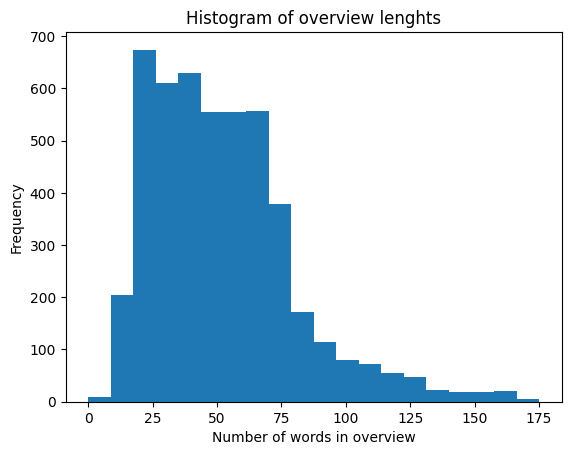

Shortest overview  0
Shortest overview  175


In [57]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in df.iterrows():
  processed_overview = remove_punctuation(row['overview'].lower())
  processed_overviews.append(processed_overview)


df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_len=[]
for index, row in tqdm(df.iterrows(), total=len(df)):
 instance = len(row['proc_overview'].split())
 overview_len.append(instance)

print(overview_len)

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_len
plt.hist(overview_len, bins=20)
plt.title('Histogram of overview lenghts')
plt.xlabel('Number of words in overview')
plt.ylabel('Frequency')
plt.show()

print("Shortest overview ", df['overview_len'].min())
print("Shortest overview ", df['overview_len'].max())

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

The shortest overview i 1 and the longest 175. The highest frequency occurs between 25 and 75 word overviews thus I would recomend this range of lenghts.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [58]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df['overview_len'] >= token_len]

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df['proc_overview'].apply(lambda x: ' '.join(x.split()[:token_len]))

# print to verify
print(df)

                                         title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4794                                    Cavite   
4795                               El Mariachi   
4797                 Signed, Sealed, Delivered   
4798                          Shanghai Calling   
4799                         My Date with Drew   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1     Captain Barbossa, long believed to be dead, ha...   
2     A cryptic message from Bond’s past sends him o...   
3     Following the death of District Attorney Harve...   
4     John Carter is a war-weary, former military ca...   
...                                          

<ipython-input-58-21569f545eda>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["proc_overview"] = df['proc_overview'].apply(lambda x: ' '.join(x.split()[:token_len]))


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [59]:
# hint: store all words for all movies in a set, change it to a list and sort
all_words = set()

#loop over every overview and add words to the set
for overview in df["proc_overview"]:
  words = overview.split()
  all_words.update(words)

vocab = sorted(list(all_words))
vocab_len = len(vocab)
print("Length of vocabulary: ", vocab_len)

Length of vocabulary:  12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [60]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = np.zeros(vocab_len)
     # set of encodings for this overview

    for word in row["proc_overview"].split():
        if word in vocab:
          word_index = vocab.index(word)
          word_encode = encode_labels(word, vocab)
          sentence_encode += word_encode # sum over axis=1
    encoded_labels.append(sentence_encode)





df["one_hot_overview"] = encoded_labels
print(df['one_hot_overview']) # print to verify

100%|██████████| 4707/4707 [00:36<00:00, 130.32it/s]

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4794    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4795    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4707, dtype: object


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

In [61]:
n_vectors = len(df)
vector_size = 8 * vocab_len #float takes up 8 bytes
total_bytes = n_vectors * vector_size
print(total_bytes)

470436408


*Your answer here*

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

<ipython-input-62-521274a4c49d>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(overview_pca[:, 0], overview_pca[:, 1], cmap='viridis', alpha=0.6)


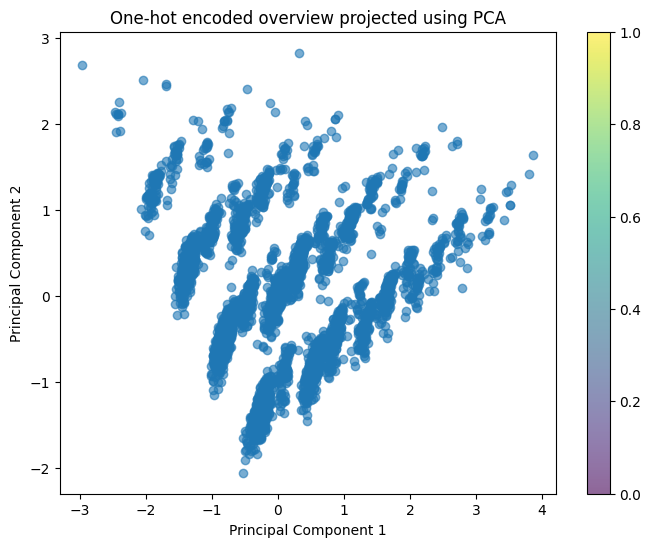

In [62]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# Set up PCA object
pca = PCA(n_components=2)  # Set the desired number of components


oho = np.vstack(df['one_hot_overview'].values)
overview_pca = pca.fit_transform(oho)


# Plotting the projected data
plt.figure(figsize=(8, 6))
plt.scatter(overview_pca[:, 0], overview_pca[:, 1], cmap='viridis', alpha=0.6)
plt.colorbar()
plt.title('One-hot encoded overview projected using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

One-hot encoded overviews are difficult to interpret however, from the PCA plot there are 4 separable clusters that can be distinguished from the data.

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

In [63]:
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_retained = np.sum(explained_variance_ratio)

print("Explained variance for each component: ", explained_variance_ratio)
print("Total variance retained: ", total_variance_retained)

Explained variance for each component:  [0.0699188  0.04296571]
Total variance retained:  0.11288450867524305


**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

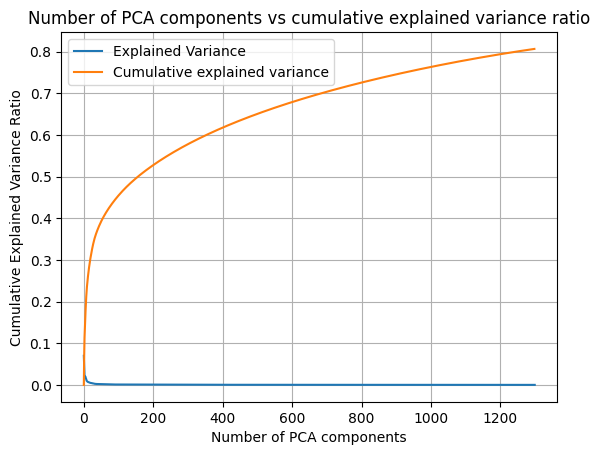

In [64]:
# Set up PCA object with the desired number of components
pca = PCA(n_components=1300)
# fit transform one_hot_overview encodings
labels_pca = pca.fit_transform(oho)
# get explained variance ratio from object, store it in a list
explained_variance_ratio = pca.explained_variance_ratio_

plt.plot(explained_variance_ratio, label="Explained Variance ")
plt.plot([np.sum(explained_variance_ratio[:i]) for i in range(len(explained_variance_ratio)-1)], label="Cumulative explained variance")
# set up y label, x label, title
plt.legend()
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Number of PCA components vs cumulative explained variance ratio')
plt.grid(True)
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [65]:
print([np.sum(explained_variance_ratio[:i]) for i in range(len(explained_variance_ratio)-1)])
print(len([np.sum(explained_variance_ratio[:i]) for i in range(len(explained_variance_ratio)-1)]))

[0.0, 0.06991879510359202, 0.1128845086753408, 0.1362226543312558, 0.15792653174622467, 0.17768040272324293, 0.1966738992882209, 0.21191931666419359, 0.2258153756881221, 0.23596674902980688, 0.24530302128949316, 0.25358035394191897, 0.26106034973962694, 0.26832907187940647, 0.275181157777134, 0.2816244596027127, 0.28758462452011696, 0.2933695301690313, 0.29885132736668063, 0.30399583180650197, 0.30883820368752063, 0.31353432655762253, 0.3181384894336862, 0.32252991403455794, 0.3268286228494391, 0.3309869256269067, 0.3347958501863094, 0.33856293817860456, 0.3420368094473572, 0.3454599142282427, 0.34864220803975426, 0.35177952027623693, 0.35459418581355406, 0.3571942841607634, 0.3597761283217968, 0.3622808765611872, 0.3647374966296883, 0.3669948640507715, 0.36922181648483143, 0.37142194395427913, 0.37358855961576737, 0.3757031881053041, 0.37771035072620135, 0.37968812933133855, 0.3816548453725393, 0.38355059583040607, 0.38541250957406703, 0.38726305707485525, 0.3890819320826765, 0.390860

In [66]:
# your code answer here

n_components_80 = 0
cum_var = [np.sum(explained_variance_ratio[:i]) for i in range(len(explained_variance_ratio)-1)]

for i, explained_variance_ratio in enumerate(cum_var):
  if explained_variance_ratio >= 0.8:
    n_components_80 = i + 1
    break


print("Number of components needed to explain 80% of the total variance:", n_components_80)

Number of components needed to explain 80% of the total variance: 1246


*Your text answer here*

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [67]:
n_dims = 1246
pca_final = PCA(n_components=1246)
labels_pca = pca_final.fit(np.array(encoded_labels))
labels_pca = pca_final.transform(np.array(encoded_labels))
labels_pca = labels_pca.tolist()
df["overview_pca"] = labels_pca
print(df['overview_pca'])

0       [0.17130556275141035, 1.254563756542268, 1.062...
1       [-0.378072930058867, -1.5934718497721458, 0.93...
2       [-1.9128810490622457, 1.1768562611981204, 0.80...
3       [0.8229543741729972, -0.448486283734624, 0.594...
4       [-0.10117960365978819, -0.22882078000654676, 0...
                              ...                        
4794    [-0.16452917101864292, -0.35828760782374103, 0...
4795    [0.4396168512077483, -1.1329578847992663, 0.36...
4797    [0.390720833479162, 0.5742052146669008, -0.262...
4798    [-0.3015446623294068, -1.1754163046978687, 0.7...
4799    [1.33680628363089, -0.2727533757524897, 0.2232...
Name: overview_pca, Length: 4707, dtype: object


# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [68]:
from sklearn.cluster import KMeans
# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
# fit model
kmeans.fit(labels_pca)

# Add the predicted cluster into the dataframe as a new column called cluster_kmeans
df["cluster_kmeans"] = kmeans.labels_

# Print out the elements of cluster number 0 from the dataframe
cluster_index = 0
cluster_indices = np.where(kmeans.labels_ == cluster_index)[0]
for index in cluster_indices:
    print(df.iloc[index]["title"])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Toy Story 3
Terminator Salvation
The Dark Knight
Hugo
Dawn of the Planet of the Apes
The Hunger Games: Mockingjay - Part 2
Transformers
Mad Max: Fury Road
Mission: Impossible - Ghost Protocol
Watchmen
The Twilight Saga: Breaking Dawn - Part 2
Rango
Home
How the Grinch Stole Christmas
The Day After Tomorrow
Life of Pi
Elysium
Speed Racer
The Patriot
I, Robot
Eraser
In the Heart of the Sea
Green Zone
Lara Croft: Tomb Raider
Men in Black
The Departed
Lara Croft Tomb Raider: The Cradle of Life
Cinderella Man
The Rundown
Hellboy II: The Golden Army
Fury
Pompeii
Hidalgo
The Secret Life of Pets
Madagascar
Charlie Wilson's War
Flight of the Phoenix
Inglourious Basterds
Alvin and the Chipmunks: The Squeakquel
Apollo 13
Les Misérables
Primary Colors
Random Hearts
Perfume: The Story of a Murderer
Hellboy
The Hunted
The Godfather: Part III
Beverly Hills Cop III
Ninja Assassin
The Iron Giant
The Scarlet Letter
3:10 to Yuma
The Flintstones
The Fugitive
The Sweetest Thing
Dracula
Autumn in New York
P

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

There is a lot of action movies in this cluster which seems quite reasonable. However, there are some unexplainable exceptions, such a Quo Vadis or A Bridge too Far

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

There is no clear elbow, but I would distinguish between 6 clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

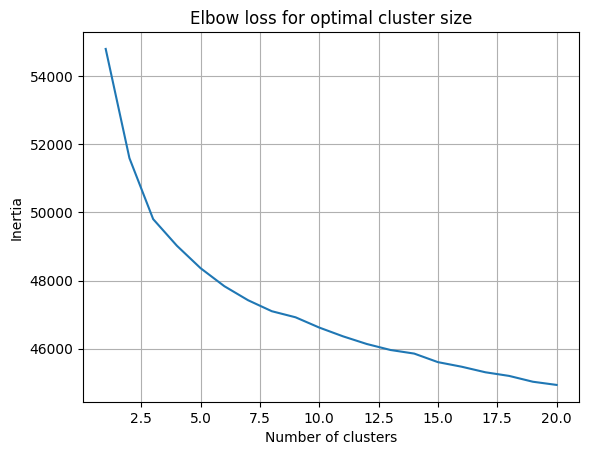

In [69]:
inertia=[]
cluster_size = range(1, 21)

for k in cluster_size:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(labels_pca)
  inertia.append(kmeans.inertia_)

plt.plot(cluster_size, inertia)
plt.title('Elbow loss for optimal cluster size')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()




# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [73]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20)
gmm.fit(labels_pca)

df["cluster_gmm"] = gmm.predict(labels_pca)

In [76]:
cluster_number = 0
cluster_indices = df.index[df['cluster_gmm'] == cluster_number]
for index in cluster_indices:
  print(df.loc[index, "title"])

TRON: Legacy
Toy Story 3
The Chronicles of Narnia: The Lion, the Witch and the Wardrobe
Up
Shrek the Third
Bad Boys II
X2
Batman & Robin
Ocean's Twelve
The Aviator
Allegiant
Stuart Little
American Gangster
Batman Forever
The Expendables 3
Green Zone
The Alamo
Percy Jackson & the Olympians: The Lightning Thief
Atlantis: The Lost Empire
Percy Jackson: Sea of Monsters
Collateral Damage
Creepshow
Alvin and the Chipmunks: Chipwrecked
Four Christmases
Face/Off
Daylight
The Adventures of Rocky & Bullwinkle
Braveheart
Alvin and the Chipmunks: The Squeakquel
Lucky Numbers
Meet the Fockers
Wild Hogs
The Bourne Identity
Cheaper by the Dozen 2
Any Given Sunday
This Is It
Bowfinger
The Hunted
Gods and Generals
Thunderbirds
Moulin Rouge!
The Dukes of Hazzard
Erin Brockovich
Shanghai Knights
Silent Hill
Beverly Hills Cop III
Marmaduke
Chappie
Lord of War
Dracula
The Doors
The Other Boleyn Girl
Marie Antoinette
Spy Kids 2: The Island of Lost Dreams
Dragon Nest: Warriors' Dawn
The Hurricane
Rock Star
H

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

Personally, I believe this clustering perfoms worse relative to K-Means as there is less amount of movies from the same genre.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

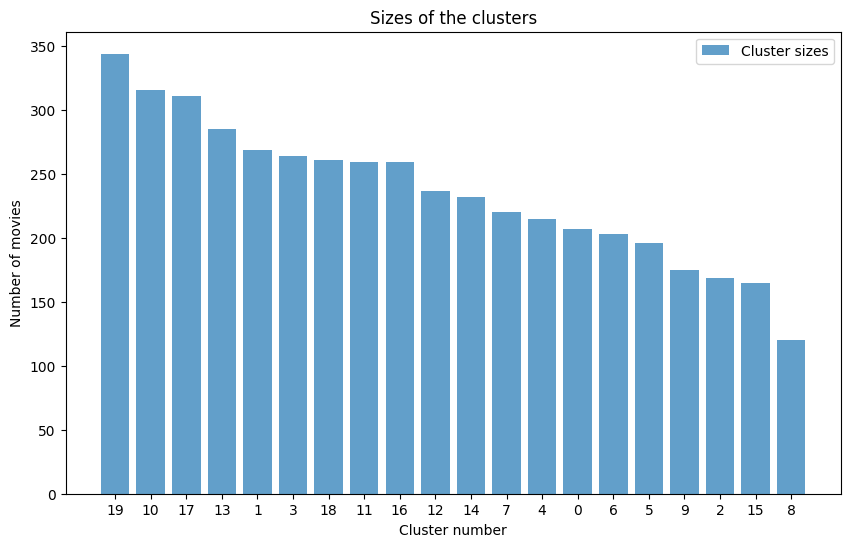

In [77]:
# Create an array for the x-axis positions
# Plotting the bars
# Add labels, title, and legend
cluster_counts = df['cluster_gmm'].value_counts()
x = range(len(cluster_counts))

plt.figure(figsize=(10,6))
plt.bar(x, cluster_counts, alpha = 0.7, label='Cluster sizes')
plt.title('Sizes of the clusters')
plt.xlabel('Cluster number')
plt.ylabel('Number of movies')
plt.legend()
plt.xticks(x, cluster_counts.index)
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

There are singnificant differences between the cluster sizes. The uniform size would be between 200 and 250.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [78]:
# Movie of interest
prev_watch = "Avatar"

# Find cluster index for Avatar in K-means
cluster_kmeans = df[df['title'] == prev_watch]['cluster_kmeans'].values[0]

# Find cluster index for Avatar in GMM
cluster_gmm = df[df['title'] == prev_watch]['cluster_gmm'].values[0]

# Print out similar movies for K-means
print("Movies similar to", prev_watch, "based on K-means clustering:")
similar_movies_kmeans = df[df['cluster_kmeans'] == cluster_kmeans]['title']
for movie in similar_movies_kmeans:
    if movie != prev_watch:  # Exclude the movie itself
        print("-", movie)

print("\n")

# Print out similar movies for GMM
print("Movies similar to", prev_watch, "based on GMM clustering:")
similar_movies_gmm = df[df['cluster_gmm'] == cluster_gmm]['title']
for movie in similar_movies_gmm:
    if movie != prev_watch:  # Exclude the movie itself
        print("-", movie)


Movies similar to Avatar based on K-means clustering:
- The Lone Ranger
- Brave
- Star Trek Beyond
- 2012
- The Jungle Book
- Maleficent
- I Am Legend
- Charlie and the Chocolate Factory
- The Matrix Reloaded
- Fantastic 4: Rise of the Silver Surfer
- Star Wars: Episode I - The Phantom Menace
- The Croods
- Real Steel
- The Smurfs 2
- Batman Forever
- Starship Troopers
- Mission to Mars
- Conan the Barbarian
- Happy Feet
- Safe House
- Dredd
- The Hangover Part II
- Batman Returns
- Face/Off
- The Pink Panther
- Six Days Seven Nights
- Spirit: Stallion of the Cimarron
- The Time Machine
- Daylight
- Battlefield Earth
- A Sound of Thunder
- Be Cool
- The Man from U.N.C.L.E.
- Immortals
- Sphere
- Wall Street: Money Never Sleeps
- The Finest Hours
- The Last Legion
- Oliver Twist
- The Truman Show
- The Italian Job
- The Sentinel
- Event Horizon
- Executive Decision
- Evita
- The Pirates! In an Adventure with Scientists!
- The Phantom of the Opera
- Gods and Generals
- Thunderbirds
- Bla

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

I believe each recommender systems are good to some extent. I would use them if I were to be asked about a movie suggestion, however, I would double check if the output does fit the genre of my choice.

**Q6.3** How would you try making the recommender systems better?

By providing more explanatory variables, such as ratings, the recommender system would be probably better.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

By creating a new cluster.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [81]:
indexmovie = df['title'].tolist().index(prev_watch)

In [82]:
def cosine_sim(v1, v2):
    dot_product = np.dot(v1, v2)
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)
    return dot_product/(magnitude_v2 * magnitude_v1)

# get overview_pca encoding of previously watched film
prev_watch_enc = df['overview_pca'][indexmovie]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(prev_watch_enc, row['overview_pca']))

df["cos_sim_to_avatar"] = sims
df = df.sort_values('cos_sim_to_avatar') # sort df
df # print to verify

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
440,Four Christmases,Brad and Kate have made something of an art fo...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",brad and kate have made something of an art fo...,78,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4456589702091435, -0.6651103383779684, -1.2...",18,0,-0.336722
3546,A Room for Romeo Brass,"Two twelve-year-old boys, Romeo and Gavin, und...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",two twelveyearold boys romeo and gavin undergo...,53,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.09297364291406078, -1.225454702532788, -1.4...",17,17,-0.330190
16,The Avengers,When an unexpected enemy emerges and threatens...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when an unexpected enemy emerges and threatens...,47,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.09052639496232108, -1.21285352499275, -1.44...",17,17,-0.325909
4632,The Incredibly True Adventure of Two Girls In ...,An adventurous love story between two young wo...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",Romance,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",an adventurous love story between two young wo...,27,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1407063283514759, -0.8539432716626318, -0.9...",5,12,-0.321322
406,Arthur Christmas,"Each Christmas, Santa and his vast army of hig...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 16, ""name...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",each christmas santa and his vast army of high...,76,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.060378004907837, -1.2501400290536642, -1.42...",9,17,-0.320208
...,...,...,...,...,...,...,...,...,...,...,...,...
415,Dredd,"In the future, America is a dystopian wastelan...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the future america is a dystopian wasteland...,87,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.23152067361937967, 1.4016470372925822, 0.35...",1,13,0.452697
1285,Nomad: The Warrior,The Nomad is a historical epic set in 18th-cen...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 36, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the nomad is a historical epic set in 18thcent...,39,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2502330102123388, 1.4192751540294832, 0.331...",1,13,0.467130
3778,Zipper,Sam Ellis is a man on the rise — a hot-shot fe...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",sam ellis is a man on the rise a hotshot feder...,48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.21497561521977848, 1.4085478017734023, 0.51...",1,19,0.470665
3363,Warlock,A warlock flees from the 17th to the 20th cent...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",a warlock flees from the 17th to the 20th cent...,122,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.14285163674538576, 1.194036029571188, 1.009...",1,10,0.528808


Visually, it is more appealing. Contentwise, I preferred previous recommender tools.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [83]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [ ]:
# your code here: feel free to add extra

#I am sorry but it is already too late for me to provide you with a quality model and I am fighting for my life,
#lying sick in the bed...

Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

*Your text answer here*

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)